In [2]:

path = r"C:\Users\Deniz Bilen\Desktop\VAPE\FLORIDA DATA\SUSPENSION BY SCHOOL"
files = glob.glob(path + r"\*.xls*")

dfs = []

for f in files:
    # ✅ Always read the "Schools" sheet
    df = pd.read_excel(f, sheet_name="Schools", skiprows=6)

    # ✅ Extract year-like code from filename
    match = re.search(r"\d{4}", f)
    if match:
        code = match.group(0)
        if code.startswith("21") and code != "2021":
            year = 2000 + int(code[:2])   # e.g. "2122" -> 2021
        elif code.startswith("22"):
            year = 2000 + int(code[:2])   # e.g. "2223" -> 2022
        elif code.startswith("23"):
            year = 2000 + int(code[:2])   # e.g. "2324" -> 2023
        else:
            year = int(code)
        df["year"] = year
    else:
        df["year"] = None

    dfs.append(df)

# ✅ Combine all years into one dataset
df_by_year = pd.concat(dfs, ignore_index=True)

# ✅ Clean column names
df_by_year.columns = df_by_year.columns.map(str).str.strip().str.lower()
df_by_year["year"] = df_by_year["year"].astype(int)

# ✅ Print preview
print("Years in dataset:", sorted(set(df_by_year["year"].tolist())))
print(df_by_year[["year", "district name", "school name", "type of incident", "total incidents"]].head())


KeyboardInterrupt: 

In [35]:
print(df_by_year[df_by_year["year"]==2022][["school name","type of incident","vaping related"]].head(20))



      school name type of incident  vaping related
78947         NaN              NaN             NaN
78948         NaN              NaN             NaN
78949         NaN              NaN             NaN
78950         NaN              NaN             NaN
78951         NaN              NaN             NaN
78952         NaN              NaN             NaN
78953         NaN              NaN             NaN
78954         NaN              NaN             NaN
78955         NaN              NaN             NaN
78956         NaN              NaN             NaN
78957         NaN              NaN             NaN
78958         NaN              NaN             NaN
78959         NaN              NaN             NaN
78960         NaN              NaN             NaN
78961         NaN              NaN             NaN
78962         NaN              NaN             NaN
78963         NaN              NaN             NaN
78964         NaN              NaN             NaN
78965         NaN              

['vaping related']


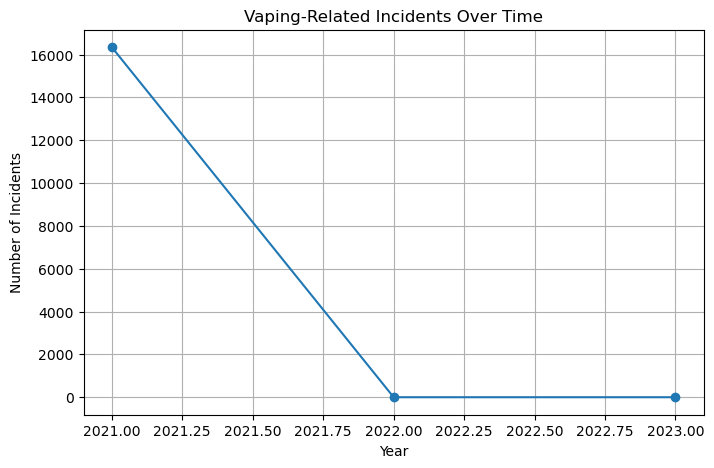

year
2021    16340.0
2022        0.0
2023        0.0
Name: vaping related, dtype: float64


In [32]:
import matplotlib.pyplot as plt

# Make sure all columns are clean
df_by_year.columns = df_by_year.columns.str.strip().str.lower()

df_by_year.columns = df_by_year.columns.map(str).str.strip().str.lower()

# Check exact vaping column name
print([col for col in df_by_year.columns if "vap" in col])

# Plot vaping-related incidents over years
vaping = df_by_year.groupby("year")["vaping related"].sum()

vaping.plot(marker="o", figsize=(8,5))
plt.title("Vaping-Related Incidents Over Time")
plt.ylabel("Number of Incidents")
plt.xlabel("Year")
plt.grid(True)
plt.show()

# Print raw numbers too
print(vaping)
